In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
#Read data

train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

train.shape

(1460, 80)

In [4]:
test.shape

(1459, 79)

180921.19589041095

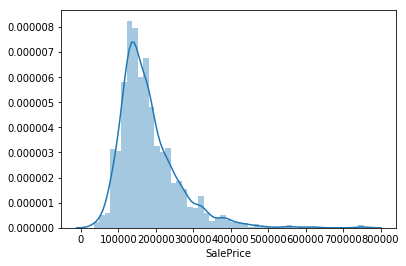

In [5]:
sns.distplot(train.SalePrice);
np.mean(train.SalePrice)

In [6]:
skew = train.skew()
kurt = train.kurt() 
corr = train.corr()['SalePrice']
cols = ['skew', 'kurt', 'corr']
details = pd.concat([skew, kurt, corr], axis = 1, sort=False)
details.columns = cols
details[details['corr'] >= 0.2].sort_values(['corr', 'kurt'], ascending = False)
# details.shape

,skew,kurt,corr
SalePrice,1.882876,6.536282,1.000000
OverallQual,0.216944,0.096293,0.790982
GrLivArea,1.366560,4.895121,0.708624
GarageCars,-0.342549,0.220998,0.640409
GarageArea,0.179981,0.917067,0.623431
TotalBsmtSF,1.524255,13.250483,0.613581
1stFlrSF,1.376757,5.745841,0.605852
FullBath,0.036562,-0.857043,0.560664
TotRmsAbvGrd,0.676341,0.880762,0.533723
YearBuilt,-0.613461,-0.439552,0.522897


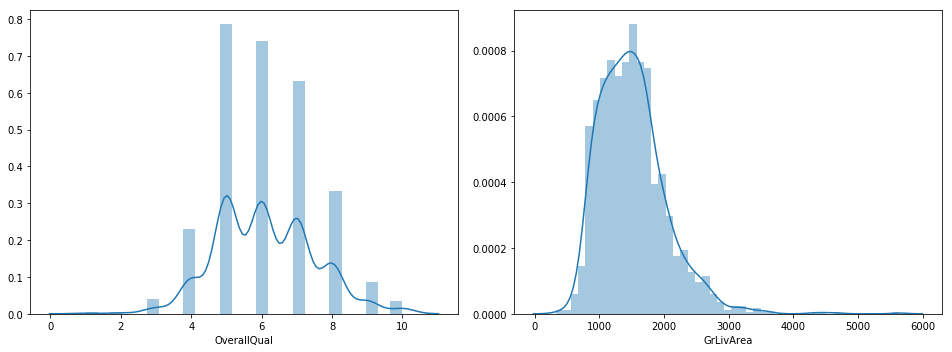

In [7]:
fig = plt.figure(figsize=(20, 5))

fig1 = fig.add_subplot(131); 
sns.distplot(train.OverallQual);

fig2 = fig.add_subplot(132); 
sns.distplot(train.GrLivArea);

plt.tight_layout(); 
plt.show()

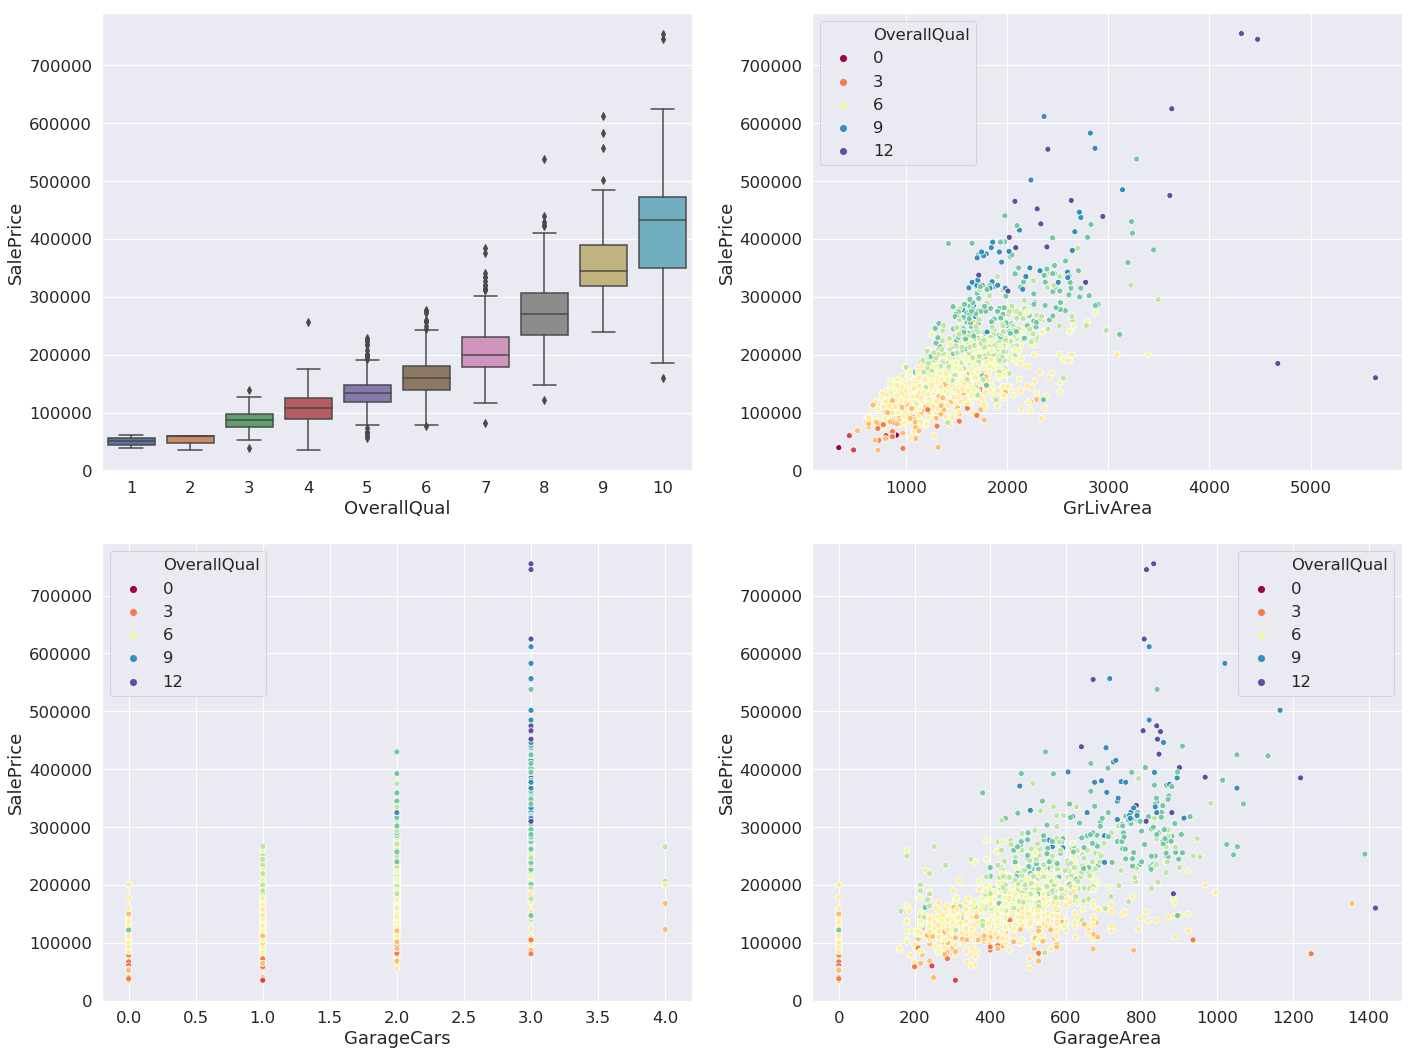

In [8]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

fig2 = fig.add_subplot(222); 
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

fig3 = fig.add_subplot(223); 
sns.scatterplot(x = train.GarageCars, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

fig4 = fig.add_subplot(224); 
sns.scatterplot(x = train.GarageArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

plt.tight_layout(); 
plt.show()

In [9]:
train_sub = train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)
corr = train_sub.corr()['SalePrice'].sort_values(ascending = False)
corr.head()

SalePrice      1.000000
OverallQual    0.795774
GrLivArea      0.734968
TotalBsmtSF    0.651153
GarageCars     0.641047
Name: SalePrice, dtype: float64

In [10]:
temp = train_sub[['SalePrice', 'GrLivArea', 'TotRmsAbvGrd']]
temp['GrLivAreaByRms'] = temp.GrLivArea/temp.TotRmsAbvGrd
temp['GrLivArea_x_Rms'] = temp.GrLivArea*temp.TotRmsAbvGrd

/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


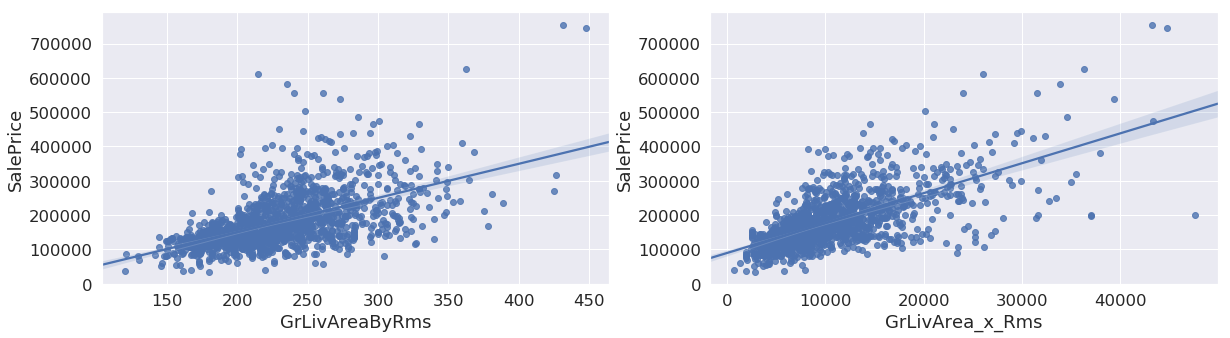

In [11]:
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); 
sns.regplot(x='GrLivAreaByRms', y='SalePrice', data=temp)

fig2 = fig.add_subplot(122); 
sns.regplot(x='GrLivArea_x_Rms', y='SalePrice', data=temp)
# plt.legend(['Outliers'])
plt.show()

In [12]:
max(temp['GrLivArea_x_Rms'])
train_sub = train_sub[train_sub.GrLivArea * train_sub.TotRmsAbvGrd < 45000]

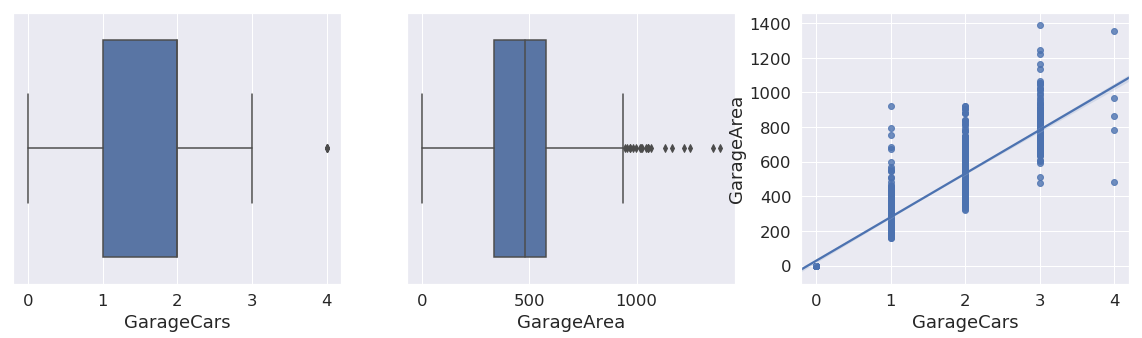

In [13]:
fig = plt.figure(figsize=(20,5))

fig1 = fig.add_subplot(131); 
sns.boxplot(train_sub.GarageCars)

fig2 = fig.add_subplot(132); 
sns.boxplot(train_sub.GarageArea)

fig3 = fig.add_subplot(133); 
sns.regplot(x='GarageCars', y='GarageArea', data=train_sub)
# sns.boxplot(train_sub.GarageCars, train_sub.GarageArea)

plt.show()

/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


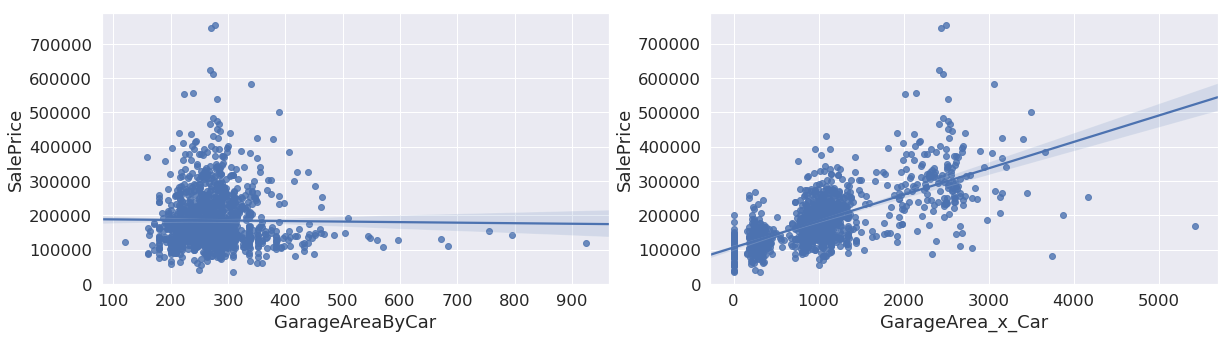

In [14]:
temp = train_sub[['SalePrice', 'GarageArea', 'GarageCars']]
temp['GarageAreaByCar'] = temp.GarageArea/temp.GarageCars
temp['GarageArea_x_Car'] = temp.GarageArea*temp.GarageCars

fig = plt.figure(figsize=(20,5))

fig1 = fig.add_subplot(121); 
sns.regplot(x='GarageAreaByCar', y='SalePrice', data=temp)

fig2 = fig.add_subplot(122); 
sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=temp); 

plt.show()

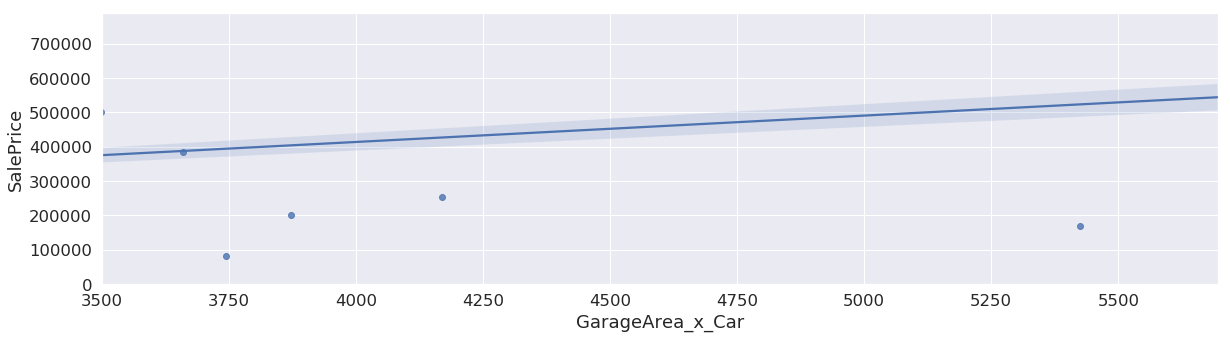

In [15]:
fig = plt.figure(figsize=(20,5))
sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=temp); 
plt.xlim(3500,)
plt.show()

In [16]:
train_sub = train_sub.loc[temp.GarageArea_x_Car<3700]

In [18]:
#set features and target

x_train = train_sub.iloc[:, :-1]
target = train_sub.iloc[:, -1]

#Define continuous and categorical variables

cont =['LotFrontage', 'LotArea', 'MasVnrArea', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath']

cat = list(set(x_train.columns) - set(cont))


In [19]:
data = pd.concat([train_sub, test]).reset_index(drop=True)
data.shape
# data.head()

/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2912, 80)

In [20]:
for i in cat:
    print(data[i].value_counts().sort_index())

N     196
Y    2716
Name: CentralAir, dtype: int64
1.5Fin     314
1.5Unf      19
1Story    1468
2.5Fin       7
2.5Unf      24
2Story     869
SFoyer      83
SLvl       128
Name: HouseStyle, dtype: int64
Ex      12
Fa      67
Gd     298
Po       3
TA    2532
Name: ExterCond, dtype: int64
AllPub    2909
NoSeWa       1
Name: Utilities, dtype: int64
Av     417
Gd     274
Mn     239
No    1900
Name: BsmtExposure, dtype: int64
Blmngtn     28
Blueste     10
BrDale      30
BrkSide    108
ClearCr     44
CollgCr    267
Crawfor    103
Edwards    192
Gilbert    165
IDOTRR      92
MeadowV     37
Mitchel    113
NAmes      442
NPkVill     23
NWAmes     131
NoRidge     71
NridgHt    165
OldTown    239
SWISU       47
Sawyer     151
SawyerW    125
Somerst    182
StoneBr     51
Timber      72
Veenker     24
Name: Neighborhood, dtype: int64
Maj1      19
Maj2       9
Min1      65
Min2      70
Mod       35
Sev        2
Typ     2710
Name: Functional, dtype: int64
2006    619
2007    689
2008    620
2009    64

In [21]:
data.GarageYrBlt[data.GarageYrBlt == 2207] = 2007

/home/sofiawangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
data.drop('Utilities', axis=1)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,poolQual
0,856,854,0,1,3,0,3,3,706.0,0.0,...,8,0,1,8,856.0,0,2003,2003,2008,3.0
1,1262,0,0,1,3,0,3,1,978.0,0.0,...,8,0,1,6,1262.0,298,1976,1976,2007,2.0
2,920,866,0,1,3,0,3,2,486.0,0.0,...,8,0,1,6,920.0,0,2001,2002,2008,3.0
3,961,756,0,1,3,0,1,3,216.0,0.0,...,8,0,1,7,756.0,0,1915,1970,2006,3.0
4,1145,1053,0,1,4,0,3,0,655.0,0.0,...,8,0,1,9,1145.0,192,2000,2000,2008,4.0
5,796,566,320,1,1,0,3,3,732.0,0.0,...,8,0,1,5,796.0,40,1993,1995,2009,2.0
6,1694,0,0,1,3,0,3,0,1369.0,0.0,...,8,0,1,7,1686.0,255,2004,2005,2007,4.0
7,1107,983,0,1,3,0,3,2,859.0,32.0,...,8,0,1,7,1107.0,235,1973,1973,2009,3.0
8,1022,752,0,1,2,0,3,3,0.0,0.0,...,8,0,1,8,952.0,90,1931,1950,2008,3.0
9,1077,0,0,1,2,1,3,3,851.0,0.0,...,8,0,1,5,991.0,0,1939,1950,2008,2.0


In [23]:
data[cat].apply(lambda x: [x.unique()])

CentralAir                                                [[Y, N]]
HouseStyle       [[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl...
ExterCond                                   [[TA, Gd, Fa, Po, Ex]]
Utilities                                  [[AllPub, NoSeWa, nan]]
BsmtExposure                               [[No, Gd, Mn, Av, nan]]
Neighborhood     [[CollgCr, Veenker, Crawfor, NoRidge, Mitchel,...
Functional          [[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev, nan]]
YrSold                            [[2008, 2007, 2006, 2009, 2010]]
MSZoning                          [[RL, RM, C (all), FV, RH, nan]]
FireplaceQu                            [[nan, TA, Gd, Fa, Ex, Po]]
Foundation            [[PConc, CBlock, BrkTil, Wood, Slab, Stone]]
SaleType         [[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con,...
Street                                              [[Pave, Grvl]]
Electrical                [[SBrkr, FuseF, FuseA, FuseP, Mix, nan]]
GarageQual                             [[TA, Fa, Gd, nan, Ex, 

In [24]:
#Total:2,912
has_null = data.columns[data.isnull().any(axis = 0)]

no_nulls = data[has_null].apply(lambda x: x.isnull().sum())
nulls_perc = data[has_null].apply(lambda x: x.isnull().sum()/2912)

has_nulls = pd.concat([no_nulls, nulls_perc], axis=1)
has_nulls.columns = ['nulls', 'percent']
has_nulls.sort_values('nulls', ascending = False)
has_nulls[has_nulls.percent > 0.1].sort_values('nulls', ascending = False)

,nulls,percent
PoolQC,2903,0.996909
MiscFeature,2808,0.964286
Alley,2715,0.932349
Fence,2341,0.803915
SalePrice,1459,0.501030
FireplaceQu,1417,0.486607
LotFrontage,485,0.166552


In [26]:
data.loc[data.PoolArea == 0, ['PoolQC']] = 'NA'
data.loc[data.PoolArea > 0, ['OverallQual','PoolArea', 'PoolQC']].sort_values('PoolQC')

,OverallQual,PoolArea,PoolQC
197,8,512,Ex
1178,10,555,Ex
1967,10,144,Ex
2566,8,228,Ex
807,6,648,Fa
1379,7,519,Fa
1166,6,576,Gd
1416,6,738,Gd
2703,7,800,Gd
2413,4,368,NaN


In [45]:
#        Ex	Excellent >5
#        Gd	Good 4
#        TA	Average/Typical 3
#        Fa	Fair 2
#        NA	No Pool 0
(data.OverallQual[data.PoolArea > 0]/2).round().unique()
data['poolQual'] = (data.OverallQual/2).round()
qual = {2: 'Fa', 3: 'TA', 4: 'Gd', 5: 'Ex'}

data.loc[(data.PoolArea>0) & (data.PoolQC.isnull()), ['PoolQC']] = (data.loc[(data.PoolArea>0) & (data.PoolQC.isnull()),  ['OverallQual']]/2).round().apply(lambda x: x.map(qual))


In [46]:
data.loc[data.MiscFeature.isnull(), ['MiscFeature']] = 'NA'
data.loc[data.Alley.isnull(), ['Alley']] = 'NA'
data.loc[data.Fence.isnull(), ['Fence']] = 'NA'

In [48]:
data.loc[(data.Fireplaces == 0), ['FireplaceQu']] = 'NA'
data.loc[data.SalePrice.isnull(), ['SalePrice']] = 0

In [49]:
lotmean = data.groupby('Neighborhood').LotFrontage.mean()
data.loc[data.LotFrontage.isnull(), ['LotFrontage']] = data.loc[data.LotFrontage.isnull(), ['Neighborhood', 'LotFrontage']].apply(lambda x: lotmean[x.Neighborhood], axis=1)


In [50]:
#impute
fill = pd.Series([data[c].value_counts().index[0]
            if c in cat else data[c].mean() for c in data],
            index=data.columns)

data = data.fillna(fill)

In [51]:
data[cat].apply(lambda x: [x.unique()])

CentralAir                                                [[1, 0]]
HouseStyle                              [[5, 2, 0, 1, 6, 7, 4, 3]]
ExterCond                                        [[4, 2, 1, 3, 0]]
Utilities                                                 [[0, 1]]
BsmtExposure                                        [[3, 1, 2, 0]]
Neighborhood     [[5, 24, 6, 15, 11, 21, 14, 17, 3, 19, 16, 12,...
Functional                                 [[6, 2, 0, 3, 4, 1, 5]]
MSZoning                                         [[3, 4, 0, 1, 2]]
FireplaceQu                                  [[NA, 5, 2, 1, 0, 4]]
Foundation                                    [[2, 1, 0, 5, 3, 4]]
SaleType                             [[8, 6, 0, 3, 4, 1, 5, 2, 7]]
Street                                                    [[1, 0]]
Electrical                                       [[4, 1, 0, 2, 3]]
GarageQual                                       [[4, 1, 2, 0, 3]]
Condition2                              [[2, 0, 7, 1, 3, 4, 6,

In [34]:
sum(data.isnull().sum())

0

In [35]:
cont = cont + ['MoSold', 'YearBuilt', 'OverallCond', 'MSSubClass', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
cat = list(set(data.columns) - set(cont))

In [36]:
le = LabelEncoder()

for i in cat:
    data[i] = le.fit_transform(data[i])

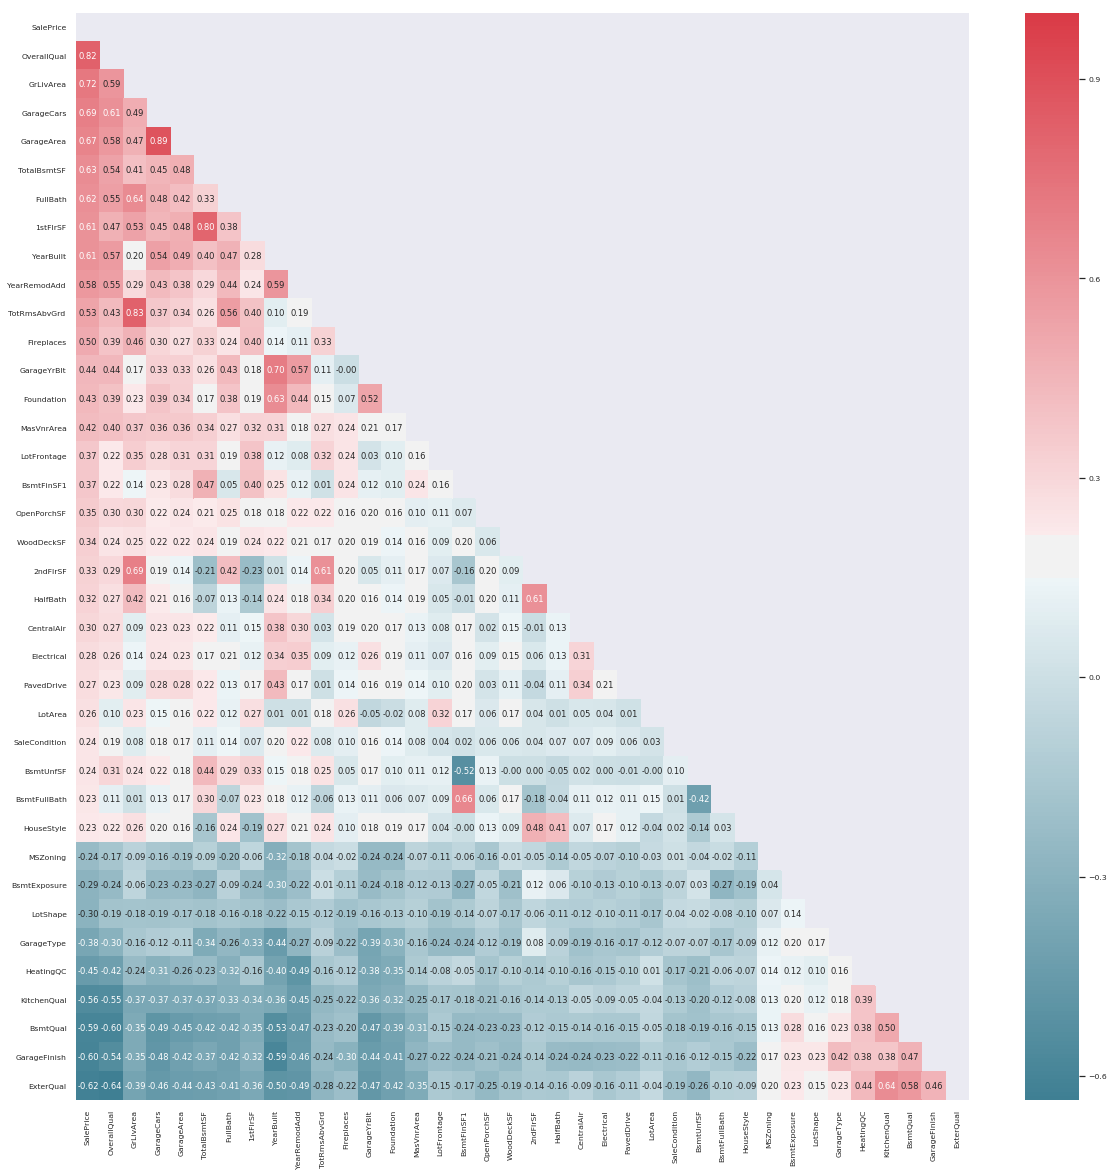

In [58]:
train = data.loc[data.SalePrice > 0]
corr = train.corr()
corr_cols = corr[abs(corr.SalePrice) > 0.2].SalePrice.sort_values(ascending=False).keys()
top_corr = corr.loc[corr_cols, corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1)


In [60]:
data = data.drop(['GarageArea', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'poolQual'], axis =1)

KeyError: "['GarageArea' 'GarageCars' 'GrLivArea' 'TotalBsmtSF' '1stFlrSF'] not found in axis"

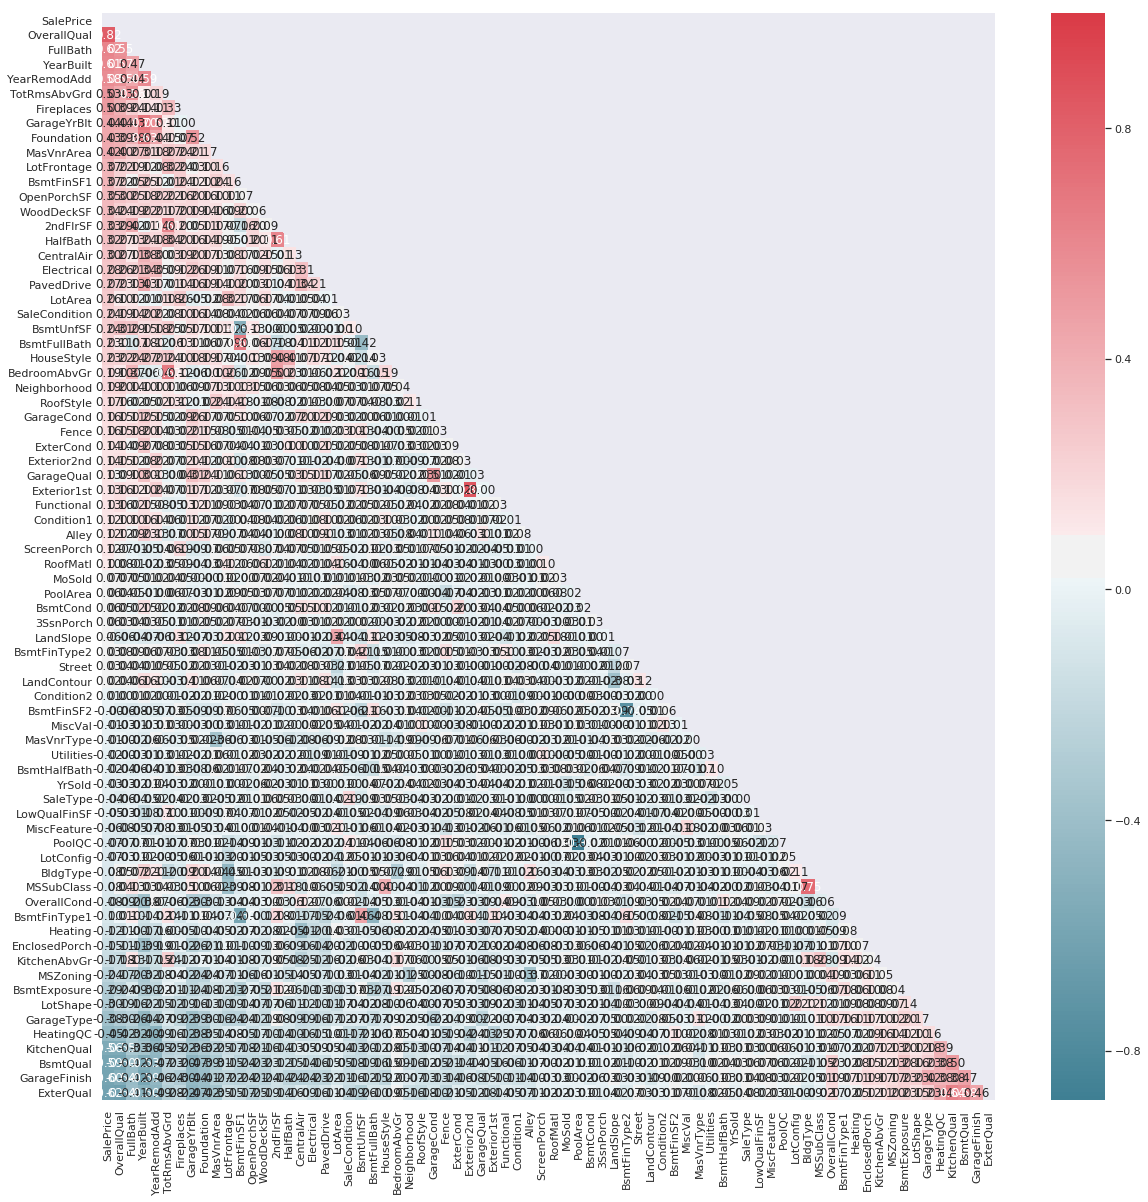

In [75]:
train = data.loc[data.SalePrice > 0]
corr = train.corr()
corr_cols = corr.SalePrice.sort_values(ascending=False).keys()
top_corr = corr.loc[corr_cols, corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1)

In [79]:
# #look at multicollinearity with VIF
# vif = {'factor': [], 'features': []}

# for i in range(data.shape[1]):
#     print(data.columns[i])
#     factor = variance_inflation_factor(data.values, i)
    
# #     if factor <= 5:
#     vif['factor'].append(factor)
#     vif['features'].append(data.columns[i])
        
# # relevant_features2 = data[vif['features']]

# # len(relevant_features2.columns)
# vif

variance_inflation_factor(data.values, 0)

TypeError: '>=' not supported between instances of 'str' and 'int'